<a href="https://colab.research.google.com/github/heokwon/Dog_Classification/blob/main/Data_Preprocessing%26Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 불러오기

In [ ]:
!mkdir dataset
!mkdir dataset/CockerSpaniel_naver
!mkdir dataset/Poodle_naver

mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/CockerSpaniel_naver’: File exists
mkdir: cannot create directory ‘dataset/Poodle_naver’: File exists


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os # 경로를 컨트롤 할 때 쓰이는 library 
import cv2 # 이미지 처리를 위한 library

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

import pickle
from tqdm.notebook import tqdm

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/4조 이미지인식(미니프로젝트)/전처리 전' # 경로를 가져옴 / 문자열=만들어둔 폴더의 경로
os.listdir(data_path) # 해당 path의 폴더 하위 목록들을 뽑아옴 > label

['Poodle', 'CockerSpaniel']

# Crawling data pickle파일 병합

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/코카,푸들(이미지).pickle','rb') as f:
  co_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/코카,푸들(라벨).pickle','rb') as f:
  co_label = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/말티즈,그레이하운드(이미지).pickle','rb') as f:
  mal_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/말티즈,그레이하운드(라벨).pickle','rb') as f:
  mal_label = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/퍼그,비숑(이미지).pickle','rb') as f:
  pug_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/퍼그,비송(라벨).pickle','rb') as f:
  pug_label = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/이미지데이터.pickle','rb') as f:
  img_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/라벨데이터.pickle','rb') as f:
  label_label = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/코기,인절미,포메(이미지).pickle','rb') as f:
  cogi_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/코기,인절미,포메(라벨).pickle','rb') as f:
  cogi_label = pickle.load(f)

In [ ]:
data = np.concatenate([co_data,mal_data,pug_data,img_data,cogi_data])
label = np.concatenate([co_label,mal_label,pug_label,label_label,cogi_label])

In [ ]:
data = tf.repeat(data,3,axis=3)
data.shape

In [ ]:
import pickle
with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)
with open('label.pickle', 'wb') as f:
    pickle.dump(label, f)

## 전처리

In [ ]:
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(data_path): # 폴더 
    sub_path = '/content/drive/MyDrive/Colab Notebooks/4조 이미지인식(미니프로젝트)/전처리 전/'+label+'/' 
    dataset[label] = [] # 빈 dict의 key값을 label로
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename) # key값에 해당하는 사진 경로들과 파일명을 추가

dataset

In [ ]:
a = np.array([[0]])
a

array([[0]])

In [ ]:
np.array([a, a])

array([[[0]],

       [[0]]])

In [ ]:
x_datasets, y_datasets = [], []

label2index = {'Poodle' : 2, 'CockerSpaniel' : 1}

for label, filenames in dataset.items():
    for filename in filenames:
        # img를 array 형태로 변경
        image = cv2.imread(filename) # filename에 대해 이미지를 load
        resize = lambda x: tf.image.resize(x, (224, 224)) # 크롤링 한 이미지의 크기를 resize를 통해 맞춰줌 // resize함수 만들어서 사용
        image = resize(image)
        x_datasets.append(image)

        # label을 index로 변경
        y_datasets.append(label2index[label]) # label2index를 통해 변경
x_datasets, y_datasets # 이미지가 리스트로 저장. 마지막 y_data에 1,1,1,0,0,0

In [ ]:
x_datasets[1].shape

In [ ]:
x_datasets = np.array(x_datasets) # list를 array로 형변환
x_datasets.shape

(1076, 224, 224, 3)

In [ ]:
y_datasets = np.array(y_datasets)
y_datasets

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
y_datasets.shape

(1076,)

In [ ]:
np.mean(x_datasets[0], axis=0)

In [ ]:
# zero-centering, grayscale >> 전처리
def preprocess(image, grayscale=False):
    # zero-centering : 평균값으로 빼줌
    image -= np.mean(image, axis=0) # 채널단위로 평균을 냄 >> 평균값으로 위치에 있는 애들을 빼줌 >> 평균값을 빼줌으로써 범위 스케일링해줌
                                    # zero-centering : 한쪽으로 편항되는 것을 안정화 시키기 위해서 사용
    
    # grayscale : 좀 더 단순화/ rgb(color) 3채널을 흑백 1채널로
    if grayscale:
        image = tf.image.rgb_to_grayscale(image)
    return np.array(image)

In [ ]:
x_datasets = preprocess(x_datasets, grayscale=True)

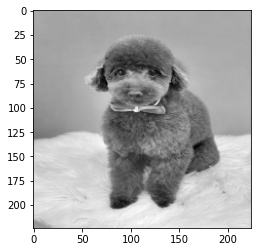

In [ ]:
plt.imshow(x_datasets[0][:,:,0], cmap='gray')
plt.show()

## piclke로 저장

In [ ]:
with open('x_dataset.pickle', 'wb') as f:
    pickle.dump(x_datasets, f)

In [ ]:
with open('y_dataset.pickle', 'wb') as f:
    pickle.dump(y_datasets, f)

## 학습용,검증용 나누기

3차원 데이터를 resizing하는데 Ram이 부족, 1차원에서 resizing하고난 뒤 3차원으로 repeat시켜주는 방법으로 해결

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/4조 이미지인식(미니프로젝트)/data.pickle','rb') as f:
  data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/4조 이미지인식(미니프로젝트)/label.pickle','rb') as f:
  label = pickle.load(f)

In [ ]:
from sklearn.model_selection import train_test_split

label에 1이 빠진것이 아니라 순서가 바껴있는상태, 모든 라벨들이 정상적으로 들어가있다

In [ ]:
label

array([ 2,  2,  2, ..., 14, 14, 14])

원래의 label에 0이 없는상태. 컴퓨터는 0부터 받기 때문에 모든 라벨값이 -1을 해줌으로써 1-14 라벨을 0-13으로 바꿔줌 

In [ ]:
label -= 1
label

array([ 1,  1,  1, ..., 13, 13, 13])

In [ ]:
train_data, test_data , train_label,test_label = train_test_split(data,label, test_size=0.2,stratify=label,random_state=34)

In [ ]:
train_data.shape

(9031, 224, 224, 1)

## 이미지 크기 줄이기(resizing)
224x224 데이터값이 너무 커 런타임실행이 안됨

In [ ]:
resize = lambda x: tf.image.resize(x, (180, 180))
# 이미지 크기 줄이는 또 다른 방법
# 0-224 사이의 숫자로 되어있는 이미지를 slicing을 통해 크기조절
# [:,42:182, 42:182] : array를 42:182로 슬라이싱하는 것을 (:) 모든 이미지 데이터에 적용
# train_data = train_data[:,42:182, 42:182]
# test_data = test_data[:,42:182, 42:182]

In [ ]:
train_data = resize(train_data)
train_data.shape

TensorShape([9031, 180, 180, 1])

In [ ]:
test_data = resize(test_data)
test_data.shape

TensorShape([2258, 180, 180, 1])

In [ ]:
# 1차원 >> 3차원
train_data = tf.repeat(train_data,3,axis=3)
test_data = tf.repeat(test_data,3,axis=3)


In [ ]:
train_data.shape

TensorShape([9031, 180, 180, 3])

In [ ]:
test_data.shape

TensorShape([2258, 180, 180, 3])

## 미세조정

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt

In [ ]:
back_model = ResNet50(include_top=False, input_shape = (180,180 ,3), weights = 'imagenet')
back_model.trainable = False

for layer in back_model.layers[-12:]:
  layer.trainable = True

inputs = tf.keras.Input(shape=(180,180,3))

x = back_model(inputs, training=False)

# FC층 학습
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(14,activation='softmax')(x)

model = tf.keras.Model(inputs,outputs)
model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model.fit(train_data,train_label, epochs=10,validation_data=(test_data, test_label),batch_size=100)

Epoch 1/10
91/91 [==============================] - 68s 574ms/step - loss: 1.5940 - accuracy: 0.5348 - val_loss: 0.7692 - val_accuracy: 0.7724
Epoch 2/10
91/91 [==============================] - 48s 529ms/step - loss: 0.8393 - accuracy: 0.7378 - val_loss: 0.6240 - val_accuracy: 0.8078
Epoch 3/10
91/91 [==============================] - 48s 530ms/step - loss: 0.6241 - accuracy: 0.7940 - val_loss: 0.6052 - val_accuracy: 0.8211
Epoch 4/10
91/91 [==============================] - 48s 530ms/step - loss: 0.5036 - accuracy: 0.8327 - val_loss: 0.6040 - val_accuracy: 0.8330
Epoch 5/10
91/91 [==============================] - 48s 530ms/step - loss: 0.3763 - accuracy: 0.8693 - val_loss: 0.5875 - val_accuracy: 0.8322
Epoch 6/10
91/91 [==============================] - 48s 530ms/step - loss: 0.3345 - accuracy: 0.8834 - val_loss: 0.6589 - val_accuracy: 0.8335
Epoch 7/10
91/91 [==============================] - 48s 530ms/step - loss: 0.2719 - accuracy: 0.9057 - val_loss: 0.6577 - val_accuracy: 0.8344

In [ ]:
## fine-tune
back_model.trainable = True # bottlenect feature 학습진행한다

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(train_data, train_label, epochs = 5, validation_data=(test_data, test_label), batch_size= 50)

Epoch 1/5
181/181 [==============================] - 165s 854ms/step - loss: 0.7281 - accuracy: 0.7822 - val_loss: 0.5540 - val_accuracy: 0.8295
Epoch 2/5
181/181 [==============================] - 152s 839ms/step - loss: 0.3949 - accuracy: 0.8770 - val_loss: 0.4628 - val_accuracy: 0.8574
Epoch 3/5
181/181 [==============================] - 162s 895ms/step - loss: 0.2889 - accuracy: 0.9099 - val_loss: 0.4233 - val_accuracy: 0.8773
Epoch 4/5
181/181 [==============================] - 152s 838ms/step - loss: 0.1982 - accuracy: 0.9377 - val_loss: 0.5692 - val_accuracy: 0.8508
Epoch 5/5
181/181 [==============================] - 152s 838ms/step - loss: 0.1448 - accuracy: 0.9526 - val_loss: 0.6579 - val_accuracy: 0.8330


180x180 일때 0.84

## 하위층 일부 재학습

In [ ]:
base_model = ResNet50(include_top=False, input_shape=(180,180,3))

In [ ]:
len(base_model.layers)

175

In [ ]:
base_model.trainable = False
base_model.trainable

False

In [ ]:
for layer in base_model.layers[-10:]:
  layer.trainable = True
for layer in base_model.layers[-20:]:
  print(layer.name, layer.trainable)

conv5_block2_1_conv False
conv5_block2_1_bn False
conv5_block2_1_relu False
conv5_block2_2_conv False
conv5_block2_2_bn False
conv5_block2_2_relu False
conv5_block2_3_conv False
conv5_block2_3_bn False
conv5_block2_add False
conv5_block2_out False
conv5_block3_1_conv True
conv5_block3_1_bn True
conv5_block3_1_relu True
conv5_block3_2_conv True
conv5_block3_2_bn True
conv5_block3_2_relu True
conv5_block3_3_conv True
conv5_block3_3_bn True
conv5_block3_add True
conv5_block3_out True


In [ ]:
inputs = tf.keras.Input(shape=(180,180,3))

x = base_model(inputs, training=False)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(14, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate=0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               18874624  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 14)                3598      
                                                                 
Total params: 42,465,934
Trainable params: 18,878,222
Non-t

In [ ]:
model.fit(train_data, train_label, epochs = 10, validation_data=(test_data, test_label), batch_size= 125,callbacks=[early])

Epoch 1/10
73/73 [==============================] - 54s 662ms/step - loss: 1.4270 - accuracy: 0.6183 - val_loss: 0.6631 - val_accuracy: 0.7998
Epoch 2/10
73/73 [==============================] - 46s 629ms/step - loss: 0.6292 - accuracy: 0.8051 - val_loss: 0.5852 - val_accuracy: 0.8282
Epoch 3/10
73/73 [==============================] - 46s 630ms/step - loss: 0.4128 - accuracy: 0.8647 - val_loss: 0.5846 - val_accuracy: 0.8295
Epoch 4/10
73/73 [==============================] - 46s 630ms/step - loss: 0.3021 - accuracy: 0.8999 - val_loss: 0.5724 - val_accuracy: 0.8366
Epoch 5/10
73/73 [==============================] - 46s 630ms/step - loss: 0.2183 - accuracy: 0.9248 - val_loss: 0.5626 - val_accuracy: 0.8437
Epoch 6/10
73/73 [==============================] - 46s 629ms/step - loss: 0.1741 - accuracy: 0.9416 - val_loss: 0.5978 - val_accuracy: 0.8423
Epoch 7/10
73/73 [==============================] - 47s 646ms/step - loss: 0.1369 - accuracy: 0.9554 - val_loss: 0.6134 - val_accuracy: 0.8401